# Recipe Recommendation Final Assignment

- Objective: Perform Exploratory Data Analysis (EDA) and feature extraction from raw recipe data to design a recommender system.
- RAW_recipes_cleaned.csv: Contains recipe-related information.
Link: https://raw-recipes-clean-upgrad.s3.amazonaws.com/RAW_recipes_cleaned.csv
- RAW_interactions_cleaned.csv: Contains user-recipe interaction data.
Link: https://raw-interactions-upgrad.s3.amazonaws.com/RAW_interactions_cleaned.csv

- Total 9 tasks are required to complete as below.

Prepared By Jack Nguyễn & Vũ Mạnh Trung Hải


## I. Task 1 - Create New Session - Importing & Reading Dataset

In [0]:
# Install library:
%pip install pandas numpy pyarrow
import pandas as pd
import numpy as np
import pyspark.pandas as ps
from pyspark.sql import SparkSession
import time

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
# Create SparkSession:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("SparkSQL").getOrCreate()

In [0]:
# Importing 2 datasets:

# File uploaded to /FileStore/RAW_recipes_cleaned.csv
# File uploaded to /FileStore/RAW_interactions_cleaned.csv

recipes = spark.read.options(inferSchema='True',header='True').csv("/FileStore/RAW_recipes_cleaned.csv")
interactions = spark.read.options(inferSchema='True',header='True').csv("/FileStore/RAW_interactions_cleaned.csv")

In [0]:
recipes_pandas = recipes.toPandas()
recipes_pandas.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,this is a super easy great tasting make ahea...,"['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [0]:
recipes_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int32 
 2   minutes         231637 non-null  int32 
 3   contributor_id  231637 non-null  int32 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int32 
 8   steps           231637 non-null  object
 9   description     231637 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int32 
dtypes: int32(5), object(7)
memory usage: 16.8+ MB


In [0]:
interactions_pandas = interactions.toPandas()
interactions_pandas.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,So simple so delicious! Great for chilly fall...
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,Made the cheddar bacon topping adding a sprin...


In [0]:
interactions_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1132367 non-null  int32 
 1   recipe_id  1132367 non-null  int32 
 2   date       1132367 non-null  object
 3   rating     1132367 non-null  int32 
 4   review     1132367 non-null  object
dtypes: int32(3), object(2)
memory usage: 30.2+ MB


## II. Task 2: Extract Nutrition Features

In [0]:
# The nutrition column is currently read as a string. 
# Extract the seven individual nutrition values from each row and create separate columns:

# Split the 'nutrition' column into separate columns
nutrition_columns = ['calories', 'total_fat_PDV', 'sugar_PDV', 'sodium_PDV', 'protein_PDV', 'saturated_fat_PDV', 'carbohydrates_PDV']
recipes_pandas[nutrition_columns] = recipes_pandas['nutrition'].str.strip('[]').str.split(',', expand=True).astype(float)

# Drop the original 'nutrition' column
recipes_pandas.drop(columns=['nutrition'], inplace=True)

recipes_pandas.head()

,name,id,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,calories,total_fat_PDV,sugar_PDV,sodium_PDV,protein_PDV,saturated_fat_PDV,carbohydrates_PDV
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,this is a super easy great tasting make ahea...,"['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0


In [0]:
recipes_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   name               231636 non-null  object 
 1   id                 231637 non-null  int32  
 2   minutes            231637 non-null  int32  
 3   contributor_id     231637 non-null  int32  
 4   submitted          231637 non-null  object 
 5   tags               231637 non-null  object 
 6   n_steps            231637 non-null  int32  
 7   steps              231637 non-null  object 
 8   description        231637 non-null  object 
 9   ingredients        231637 non-null  object 
 10  n_ingredients      231637 non-null  int32  
 11  calories           231637 non-null  float64
 12  total_fat_PDV      231637 non-null  float64
 13  sugar_PDV          231637 non-null  float64
 14  sodium_PDV         231637 non-null  float64
 15  protein_PDV        231637 non-null  float64
 16  sa

## III. Task 3: Standardize Nutrition Values

In [0]:
# Standardize the nutrition values to a per 100 calorie basis to account for serving size variations.
# To standardize the nutrition values on a per 100-calorie basis, divide each of the nutrition columns (except calories) by the calories value, then multiply by 100.

nutrition_columns_to_standardize = ['total_fat_PDV', 'sugar_PDV', 'sodium_PDV', 'protein_PDV', 'saturated_fat_PDV', 'carbohydrates_PDV']

for column in nutrition_columns_to_standardize:
    recipes_pandas[column] = (recipes_pandas[column] / recipes_pandas['calories']) * 100

recipes_pandas.head()


,name,id,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,calories,total_fat_PDV,sugar_PDV,sodium_PDV,protein_PDV,saturated_fat_PDV,carbohydrates_PDV
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.000000,25.242718,0.000000,3.883495,0.000000,7.766990
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,10.380623,0.000000,9.803922,12.687428,20.184544,0.576701
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,8.154188,11.860638,17.790956,14.455152,10.007413,1.853225
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,this is a super easy great tasting make ahea...,"['spreadable cheese with garlic and herbs', 'n...",11,368.1,4.618310,2.716653,0.543331,3.803314,2.173322,5.433306
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,0.283366,95.494474,6.517427,0.850099,0.000000,7.934259


## IV. Task 4: Convert Tags to Array

In [0]:
# The tags column is currently read as a string. Convert it to an array of strings.

recipes_pandas['tags'] = recipes_pandas['tags'].str.strip('[]').str.replace("'", "").str.split(',')
recipes_pandas.head()


,name,id,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,calories,total_fat_PDV,sugar_PDV,sodium_PDV,protein_PDV,saturated_fat_PDV,carbohydrates_PDV
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"[60-minutes-or-less, time-to-make, course, ...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.000000,25.242718,0.000000,3.883495,0.000000,7.766990
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"[30-minutes-or-less, time-to-make, course, ...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,10.380623,0.000000,9.803922,12.687428,20.184544,0.576701
2,all in the kitchen chili,112140,130,196586,2005-02-25,"[time-to-make, course, preparation, main-di...",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,8.154188,11.860638,17.790956,14.455152,10.007413,1.853225
3,alouette potatoes,59389,45,68585,2003-04-14,"[60-minutes-or-less, time-to-make, course, ...",11,['place potatoes in a large pot of lightly sal...,this is a super easy great tasting make ahea...,"['spreadable cheese with garlic and herbs', 'n...",11,368.1,4.618310,2.716653,0.543331,3.803314,2.173322,5.433306
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"[weeknight, time-to-make, course, main-ingr...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,0.283366,95.494474,6.517427,0.850099,0.000000,7.934259


In [0]:
# Display the first few rows of the 'tags' column
print(recipes_pandas['tags'].head())

0    [60-minutes-or-less,  time-to-make,  course,  ...
1    [30-minutes-or-less,  time-to-make,  course,  ...
2    [time-to-make,  course,  preparation,  main-di...
3    [60-minutes-or-less,  time-to-make,  course,  ...
4    [weeknight,  time-to-make,  course,  main-ingr...
Name: tags, dtype: object


In [0]:
# Check the type of the first value in the 'tags' column
print(type(recipes_pandas['tags'].iloc[0]))  # Should return <class 'list'>

<class 'list'>


## V. Task 5: Read and Join Interaction Data

In [0]:
# Read RAW_interactions_cleaned.csv from the provided link.
interactions_pandas.head(10)

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,So simple so delicious! Great for chilly fall...
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,Made the cheddar bacon topping adding a sprin...
5,52282,120345,2005-05-21,4,very very sweet. after i waited the 2 days i b...
6,124416,120345,2011-08-06,0,Just an observation so I will not rate. I fo...
7,2000192946,120345,2015-05-10,2,This recipe was OVERLY too sweet. I would sta...
8,76535,134728,2005-09-02,4,Very good!
9,273745,134728,2005-12-22,5,Better than the real!!


In [0]:
interactions_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1132367 non-null  int32 
 1   recipe_id  1132367 non-null  int32 
 2   date       1132367 non-null  object
 3   rating     1132367 non-null  int32 
 4   review     1132367 non-null  object
dtypes: int32(3), object(2)
memory usage: 30.2+ MB


In [0]:
interactions_pandas.count()

Out[15]: user_id      1132367
recipe_id    1132367
date         1132367
rating       1132367
review       1132367
dtype: int64

In [0]:
# Check data types of the key columns
print(recipes_pandas['id'].dtype)
print(interactions_pandas['recipe_id'].dtype)


int32
int32


In [0]:
# Join this interaction data with the recipe data using the appropriate key. 
# The resulting dataframe should contain all interactions with corresponding recipe information.

# Perform an join on 'id' from recipes_pandas and 'recipe_id' from interactions_pandas
import pandas as pd
join_df = pd.merge(interactions_pandas, recipes_pandas, left_on='recipe_id', right_on='id', how='inner')
print(join_df)

         user_id  recipe_id        date  rating  \
0          38094      40893  2003-02-17       4   
1        1293707      40893  2011-12-21       5   
2           8937      44394  2002-12-01       4   
3         126440      85009  2010-02-27       5   
4          57222      85009  2011-10-01       5   
...          ...        ...         ...     ...   
1132362   417131     241491  2007-09-05       4   
1132363   648540     241491  2010-09-06       5   
1132364  1269180     257796  2011-08-07       4   
1132365   116593      72730  2003-12-09       0   
1132366   583662     386618  2009-09-29       5   

                                                    review  \
0        Great with a salad. Cooked on top of stove for...   
1        So simple  so delicious! Great for chilly fall...   
2        This worked very well and is EASY.  I used not...   
3        I made the Mexican topping and took it to bunk...   
4        Made the cheddar bacon topping  adding a sprin...   
...            

In [0]:
join_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1132367 entries, 0 to 1132366
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   user_id            1132367 non-null  int32  
 1   recipe_id          1132367 non-null  int32  
 2   date               1132367 non-null  object 
 3   rating             1132367 non-null  int32  
 4   review             1132367 non-null  object 
 5   name               1132366 non-null  object 
 6   id                 1132367 non-null  int32  
 7   minutes            1132367 non-null  int32  
 8   contributor_id     1132367 non-null  int32  
 9   submitted          1132367 non-null  object 
 10  tags               1132367 non-null  object 
 11  n_steps            1132367 non-null  int32  
 12  steps              1132367 non-null  object 
 13  description        1132367 non-null  object 
 14  ingredients        1132367 non-null  object 
 15  n_ingredients      1132367 non-n

## VI. Task 6: Create Time-Based Features:

In [0]:
# Check datatype of those columns:
print(join_df.date.dtype)
print(join_df.submitted.dtype)

object
object


In [0]:
# Create features that capture the time elapsed between a review date and the recipe's submission date. 
# Use the date (from interactions data) and submitted columns.

import pandas as pd
from dateutil.relativedelta import relativedelta

# Convert 'date' and 'submitted' columns to datetime format
join_df['date'] = pd.to_datetime(join_df['date'])
join_df['submitted'] = pd.to_datetime(join_df['submitted'])

# Calculate elapsed days
join_df['elapsed_days'] = (join_df['date'] - join_df['submitted']).dt.days

# Define functions to calculate months and years
def calculate_elapsed_months(row):
    return relativedelta(row['date'], row['submitted']).months + relativedelta(row['date'], row['submitted']).years * 12

def calculate_elapsed_years(row):
    return relativedelta(row['date'], row['submitted']).years

join_df['elapsed_months'] = join_df.apply(calculate_elapsed_months, axis=1)
join_df['elapsed_years'] = join_df.apply(calculate_elapsed_years, axis=1)

print(join_df[['date', 'submitted', 'elapsed_days', 'elapsed_months', 'elapsed_years']].tail(10))



              date  submitted  elapsed_days  elapsed_months  elapsed_years
1132357 2009-05-18 2007-08-30           627              20              1
1132358 2009-06-19 2007-08-30           659              21              1
1132359 2010-05-15 2007-08-30           989              32              2
1132360 2011-08-21 2007-08-30          1452              47              3
1132361 2013-04-17 2011-12-31           473              15              1
1132362 2007-09-05 2007-07-19            48               1              0
1132363 2010-09-06 2007-07-19          1145              37              3
1132364 2011-08-07 2007-10-08          1399              45              3
1132365 2003-12-09 2003-10-06            64               2              0
1132366 2009-09-29 2009-08-24            36               1              0


In [0]:
join_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1132367 entries, 0 to 1132366
Data columns (total 26 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   user_id            1132367 non-null  int32         
 1   recipe_id          1132367 non-null  int32         
 2   date               1132367 non-null  datetime64[ns]
 3   rating             1132367 non-null  int32         
 4   review             1132367 non-null  object        
 5   name               1132366 non-null  object        
 6   id                 1132367 non-null  int32         
 7   minutes            1132367 non-null  int32         
 8   contributor_id     1132367 non-null  int32         
 9   submitted          1132367 non-null  datetime64[ns]
 10  tags               1132367 non-null  object        
 11  n_steps            1132367 non-null  int32         
 12  steps              1132367 non-null  object        
 13  description        1132367 

## VII. Task 7: Process Numerical Columns:


VII - 1. Column years_since_submission_on_review_date - elapsed_years: 

In [0]:
# COLUMN years_since_submission_on_review_date - elapsed_years: 

# Create percentile-based buckets for elapsed_years
join_df['elapsed_years_bucket'] = pd.qcut(join_df['elapsed_years'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'], duplicates='drop')

# Display the range of values for each bucket
elapsed_years_ranges = pd.cut(join_df['elapsed_years'], bins=pd.qcut(join_df['elapsed_years'], q=4, retbins=True)[1])
bucket_ranges = elapsed_years_ranges.cat.categories

# Analyze the average rating for each bucket
elapsed_years_avg_rating = join_df.groupby('elapsed_years_bucket')['rating'].mean().reset_index()

print(">> The range of values for each bucket:")
print(bucket_ranges)
print("\n")

print(">> The average rating for each bucket:")
print(elapsed_years_avg_rating)


>> The range of values for each bucket:
IntervalIndex([(-4.0, 0.0], (0.0, 2.0], (2.0, 5.0], (5.0, 19.0]], dtype='interval[float64, right]')


>> The average rating for each bucket:
  elapsed_years_bucket    rating
0                   Q1  4.538891
1                   Q2  4.527487
2                   Q3  4.441549
3                   Q4  4.118415


In [0]:
# Drop rows with elapsed_years < 0; and re-calculate the new range and average rating:
import numpy as np
join_df = join_df[join_df['elapsed_years'] >= 0]

# Create 4 equally spaced bins based on the range
bin_edges = np.linspace(join_df['elapsed_years'].min(), join_df['elapsed_years'].max(), 5)
join_df['elapsed_years_bucket'] = pd.cut(join_df['elapsed_years'], bins=bin_edges, labels=['Q1', 'Q2', 'Q3', 'Q4'], include_lowest=True)

# Check the range of values for each bucket
print("New range of values for each bucket:")
for i in range(len(bin_edges) - 1):
    print(f"Q{i+1}: ({bin_edges[i]}, {bin_edges[i+1]}]")

# Analyze average rating for each bucket
elapsed_years_avg_rating = join_df.groupby('elapsed_years_bucket')['rating'].mean().reset_index()
print("--------------------------------------")
print("\nAverage rating for each bucket:")
print(elapsed_years_avg_rating)


New range of values for each bucket:
Q1: (0.0, 4.75]
Q2: (4.75, 9.5]
Q3: (9.5, 14.25]
Q4: (14.25, 19.0]
--------------------------------------

Average rating for each bucket:
  elapsed_years_bucket    rating
0                   Q1  4.514166
1                   Q2  4.284806
2                   Q3  3.854682
3                   Q4  3.583277


VII - 2. Other columns:

In [0]:
# List of columns to process
columns_to_bucket = [
    'minutes', 
    'calories', 
    'total_fat_PDV', 
    'sugar_PDV', 
    'sodium_PDV', 
    'protein_PDV', 
    'saturated_fat_PDV', 
    'carbohydrates_PDV'
]

# Dictionary to store results for each column
bucket_ranges_dict = {}
average_ratings_dict = {}

for col in columns_to_bucket:
    print(f">> Processing column: {col}")
    
    # Remove null or non-meaningful values if necessary
    join_df = join_df[join_df[col].notnull()]  # Drop rows with NaN for the current column

    # Create percentile-based buckets
    try:
        join_df[f'{col}_bucket'] = pd.qcut(join_df[col], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'], duplicates='drop')
        
        # Get the range of values for each bucket
        column_ranges = pd.cut(join_df[col], bins=pd.qcut(join_df[col], q=4, retbins=True)[1])
        bucket_ranges_dict[col] = column_ranges.cat.categories

        # Calculate average ratings for each bucket
        average_ratings_dict[col] = join_df.groupby(f'{col}_bucket')['rating'].mean().reset_index()
    
        # Display results
        print(f">> The range of values for each bucket in column '{col}':")
        print(bucket_ranges_dict[col])
        print(f"\n>> The average rating for each bucket in column '{col}':")
        print(average_ratings_dict[col])
        print("\n")
        print("--------------------------------------")
 

    except ValueError as e:
        print(f"Error processing column {col}: {e}")
        print("--------------------------------------")



>> Processing column: minutes
>> The range of values for each bucket in column 'minutes':
IntervalIndex([(0.0, 20.0], (20.0, 40.0], (40.0, 70.0], (70.0, 2147483647.0]], dtype='interval[float64, right]')

>> The average rating for each bucket in column 'minutes':
  minutes_bucket    rating
0             Q1  4.464342
1             Q2  4.413638
2             Q3  4.402361
3             Q4  4.357621


--------------------------------------
>> Processing column: calories
>> The range of values for each bucket in column 'calories':
IntervalIndex([(0.0, 176.4], (176.4, 312.7], (312.7, 512.7], (512.7, 434360.2]], dtype='interval[float64, right]')

>> The average rating for each bucket in column 'calories':
  calories_bucket    rating
0              Q1  4.415222
1              Q2  4.428538
2              Q3  4.418094
3              Q4  4.382222


--------------------------------------
>> Processing column: total_fat_PDV
>> The range of values for each bucket in column 'total_fat_PDV':
IntervalIn

In [0]:
join_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1132017 entries, 0 to 1132366
Data columns (total 35 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   user_id                   1132017 non-null  int32         
 1   recipe_id                 1132017 non-null  int32         
 2   date                      1132017 non-null  datetime64[ns]
 3   rating                    1132017 non-null  int32         
 4   review                    1132017 non-null  object        
 5   name                      1132016 non-null  object        
 6   id                        1132017 non-null  int32         
 7   minutes                   1132017 non-null  int32         
 8   contributor_id            1132017 non-null  int32         
 9   submitted                 1132017 non-null  datetime64[ns]
 10  tags                      1132017 non-null  object        
 11  n_steps                   1132017 non-null  int32 

From the results provided, we can analyze for data inconsistencies and edge cases across all columns:

**>>General Observations:**

**1. **Outlier Ranges**:
   - Some buckets have unusually large upper limits, such as:
     - `minutes`: Q4 extends to `2147483647.0`, likely due to outliers.
     - `sodium_PDV`: Q4 extends to `199909.091`, which may also be an extreme outlier.
   - These extreme ranges can skew analysis, especially in the Q4 buckets.

2. **Rating Consistency Across Buckets**:
   - In most columns, there is a noticeable decrease in average rating from Q1 to Q4 (e.g., `minutes`, `calories`, `carbohydrates_PDV`).
   - This pattern might reflect diminishing customer satisfaction or other factors as the metric increases.
   - Columns like `total_fat_PDV` and `saturated_fat_PDV` show the opposite, with ratings increasing slightly toward Q4.

--------------------------------------------------------

**>> Column-Specific Observations:**

1. **`minutes`**:
   - Q4 range (`70.0, 2147483647.0`) is disproportionately large compared to other ranges, likely due to an extreme outlier.
   - Consider filtering out excessively large values (e.g., minutes > 500 or a reasonable threshold).

2. **`calories`**:
   - Q4 extends to `434360.2`, another potential outlier. Such a high calorie value may indicate data entry errors or uncommon cases.
   - Suggest capping calorie values at a plausible limit for human consumption (e.g., 5000).

3. **`sodium_PDV`**:
   - Q4 range (`8.944, 199909.091`) is exceptionally wide, likely skewed by outliers.
   - Sodium percentage values rarely exceed 200% in realistic scenarios. Consider capping.

4. **`protein_PDV`, `saturated_fat_PDV`, and `carbohydrates_PDV`**:
   - Bucket ranges are generally reasonable, though Q4 still contains higher values than most typical datasets.
   - If these values are critical for analysis, review the data source to validate upper-range accuracy.

5. **`total_fat_PDV`**:
   - The range and average rating distribution seem consistent without extreme outliers.
   - Average rating increases from Q1 to Q4, possibly indicating customer preference for higher-fat content.

6. **`sugar_PDV`**:
   - Q4 extends to `108.15`. While possible, values above 100% DV for sugar may warrant closer scrutiny.
   - The rating in Q4 is lower, possibly indicating customer dissatisfaction with high sugar content.

7. **`carbohydrates_PDV`**:
   - Q4 extends to `16.204`, which is reasonable compared to other columns.
   - The drop in ratings from Q1 to Q4 aligns with customer concerns about high carbohydrate levels.

--------------------------------------------------------

**>> Recommended Actions:**

**Outlier Detection**:
   - Use statistical methods (e.g., IQR or Z-score) to identify and cap extreme values in all columns.
   - For example:
     - `minutes`: Exclude values >500.
     - `calories`: Exclude values >5000.
     - `sodium_PDV`: Exclude values >200%.


## VIII. Task 8: Create User-Level Features:

In [0]:
import pandas as pd
import numpy as np

def calculate_user_features(df):
    # 1. Base user-level aggregates
    user_features = df.groupby('user_id').agg(
        user_avg_rating=('rating', 'mean'),
        user_avg_n_ratings=('rating', 'count'),
        user_avg_years_betwn_review_and_submission=('elapsed_years', 'mean'),
        user_avg_prep_time_recipes_reviewed=('minutes', 'mean'),
        user_avg_n_steps_recipes_reviewed=('n_steps', 'mean'),
        user_avg_n_ingredients_recipes_reviewed=('n_ingredients', 'mean'),
        user_avg_calories_recipes_reviewed=('calories', 'mean'),
        user_avg_total_fat_per_100_cal_recipes_reviewed=('total_fat_PDV', 'mean'),
        user_avg_sugar_per_100_cal_recipes_reviewed=('sugar_PDV', 'mean'),
        user_avg_sodium_per_100_cal_recipes_reviewed=('sodium_PDV', 'mean'),
        user_avg_protein_per_100_cal_recipes_reviewed=('protein_PDV', 'mean'),
        user_avg_saturated_fat_per_100_cal_recipes_reviewed=('saturated_fat_PDV', 'mean'),
        user_avg_carbohydrates_per_100_cal_recipes_reviewed=('carbohydrates_PDV', 'mean')
    )

    # 2. High ratings (5-star) aggregates
    high_ratings = df[df['rating'] == 5].groupby('user_id').agg(
        user_avg_prep_time_recipes_reviewed_high_ratings=('minutes', 'mean'),
        user_avg_n_steps_recipes_reviewed_high_ratings=('n_steps', 'mean'),
        user_avg_n_ingredients_recipes_reviewed_high_ratings=('n_ingredients', 'mean'),
        user_avg_years_betwn_review_and_submission_high_ratings=('elapsed_years', 'mean')
    )

    # 3. Merge base and high-rating features
    user_features = user_features.merge(high_ratings, on='user_id', how='left')

    # 4. Handle missing values (e.g., from high ratings aggregation)
    user_features.fillna(0, inplace=True)

    # 5. Bucketing step:
    # user_features['user_avg_rating_bucket'] = pd.qcut(user_features['user_avg_rating'], 4, labels=False, duplicates='drop')
    # user_features['user_avg_n_ratings_bucket'] = pd.qcut(user_features['user_avg_n_ratings'], 4, labels=False, duplicates='drop')
    # user_features['user_avg_years_betwn_review_and_submission_bucket'] = pd.qcut(
    #     user_features['user_avg_years_betwn_review_and_submission'], 4, labels=False, duplicates='drop')
    # user_features['user_avg_prep_time_recipes_reviewed_bucket'] = pd.qcut(
    #     user_features['user_avg_prep_time_recipes_reviewed'], 4, labels=False, duplicates='drop')
    # user_features['user_avg_n_steps_recipes_reviewed_bucket'] = pd.qcut(
    #     user_features['user_avg_n_steps_recipes_reviewed'], 4, labels=False, duplicates='drop')
    # user_features['user_avg_n_ingredients_recipes_reviewed_bucket'] = pd.qcut(
    #     user_features['user_avg_n_ingredients_recipes_reviewed'], 4, labels=False, duplicates='drop')
    # user_features['user_avg_calories_recipes_reviewed_bucket'] = pd.qcut(
    #     user_features['user_avg_calories_recipes_reviewed'], 4, labels=False, duplicates='drop')
    # user_features['user_avg_total_fat_per_100_cal_recipes_reviewed_bucket'] = pd.qcut(
    #     user_features['user_avg_total_fat_per_100_cal_recipes_reviewed'], 4, labels=False, duplicates='drop')
    # user_features['user_avg_sugar_per_100_cal_recipes_reviewed_bucket'] = pd.qcut(
    #     user_features['user_avg_sugar_per_100_cal_recipes_reviewed'], 4, labels=False, duplicates='drop')
    # user_features['user_avg_sodium_per_100_cal_recipes_reviewed_bucket'] = pd.qcut(
    #     user_features['user_avg_sodium_per_100_cal_recipes_reviewed'], 4, labels=False, duplicates='drop')
    # user_features['user_avg_protein_per_100_cal_recipes_reviewed_bucket'] = pd.qcut(
    #     user_features['user_avg_protein_per_100_cal_recipes_reviewed'], 4, labels=False, duplicates='drop')
    # user_features['user_avg_saturated_fat_per_100_cal_recipes_reviewed_bucket'] = pd.qcut(
    #     user_features['user_avg_saturated_fat_per_100_cal_recipes_reviewed'], 4, labels=False, duplicates='drop')
    # user_features['user_avg_carbohydrates_per_100_cal_recipes_reviewed_bucket'] = pd.qcut(
    #     user_features['user_avg_carbohydrates_per_100_cal_recipes_reviewed'], 4, labels=False, duplicates='drop')

    return user_features

# Now, apply this function to your dataset:
user_level_features = calculate_user_features(join_df)

# Display the first few rows of the resulting features
user_level_features.head(10)


,user_avg_rating,user_avg_n_ratings,user_avg_years_betwn_review_and_submission,user_avg_prep_time_recipes_reviewed,user_avg_n_steps_recipes_reviewed,user_avg_n_ingredients_recipes_reviewed,user_avg_calories_recipes_reviewed,user_avg_total_fat_per_100_cal_recipes_reviewed,user_avg_sugar_per_100_cal_recipes_reviewed,user_avg_sodium_per_100_cal_recipes_reviewed,user_avg_protein_per_100_cal_recipes_reviewed,user_avg_saturated_fat_per_100_cal_recipes_reviewed,user_avg_carbohydrates_per_100_cal_recipes_reviewed,user_avg_prep_time_recipes_reviewed_high_ratings,user_avg_n_steps_recipes_reviewed_high_ratings,user_avg_n_ingredients_recipes_reviewed_high_ratings,user_avg_years_betwn_review_and_submission_high_ratings
user_id,,,,,,,,,,,,,,,,,
1533,4.710938,128,0.671875,90.890625,9.000000,9.726562,402.182813,7.232297,13.635123,28.080239,8.730892,9.841813,3.013691,91.222222,8.842593,9.481481,0.740741
1535,4.473552,794,2.780856,128.691436,8.151134,7.498741,459.144710,6.080650,24.520015,9.022532,5.634724,8.183975,3.903838,168.285714,8.039916,7.262605,2.693277
1581,5.000000,1,4.000000,200.000000,18.000000,10.000000,955.500000,11.407640,0.104657,3.244375,15.175301,16.117216,0.104657,200.000000,18.000000,10.000000,4.000000
1634,3.616667,60,0.416667,39.083333,6.750000,7.283333,441.733333,7.413221,12.370164,44.969933,8.435200,9.216597,2.660588,17.958333,6.375000,7.250000,0.500000
1676,4.677419,31,3.193548,54.580645,10.806452,10.806452,492.374194,6.871258,7.649615,7.425225,14.660073,6.470179,2.221801,56.038462,11.269231,10.846154,3.230769
1755,4.500000,2,0.000000,72.500000,8.500000,8.500000,502.500000,6.311691,6.051129,16.342920,12.776813,7.659390,3.004027,120.000000,9.000000,12.000000,0.000000
1773,4.000000,4,0.500000,148.750000,14.750000,12.500000,376.225000,5.205000,15.434200,11.951161,10.969341,6.869033,3.584875,275.000000,19.000000,16.000000,0.000000
1792,4.516129,31,0.612903,217.032258,8.419355,10.419355,805.951613,6.875646,16.338751,12.777067,8.420937,8.994926,3.281245,290.619048,7.666667,10.047619,0.619048
1891,4.837838,37,1.405405,68.432432,9.405405,9.000000,728.321622,7.033525,21.912074,9.275158,6.858461,8.810185,3.413732,67.806452,8.967742,8.677419,1.161290


In [0]:
user_level_features.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226527 entries, 1533 to 2002372706
Data columns (total 17 columns):
 #   Column                                                   Non-Null Count   Dtype  
---  ------                                                   --------------   -----  
 0   user_avg_rating                                          226527 non-null  float64
 1   user_avg_n_ratings                                       226527 non-null  int64  
 2   user_avg_years_betwn_review_and_submission               226527 non-null  float64
 3   user_avg_prep_time_recipes_reviewed                      226527 non-null  float64
 4   user_avg_n_steps_recipes_reviewed                        226527 non-null  float64
 5   user_avg_n_ingredients_recipes_reviewed                  226527 non-null  float64
 6   user_avg_calories_recipes_reviewed                       226527 non-null  float64
 7   user_avg_total_fat_per_100_cal_recipes_reviewed          226527 non-null  float64
 8   user_av

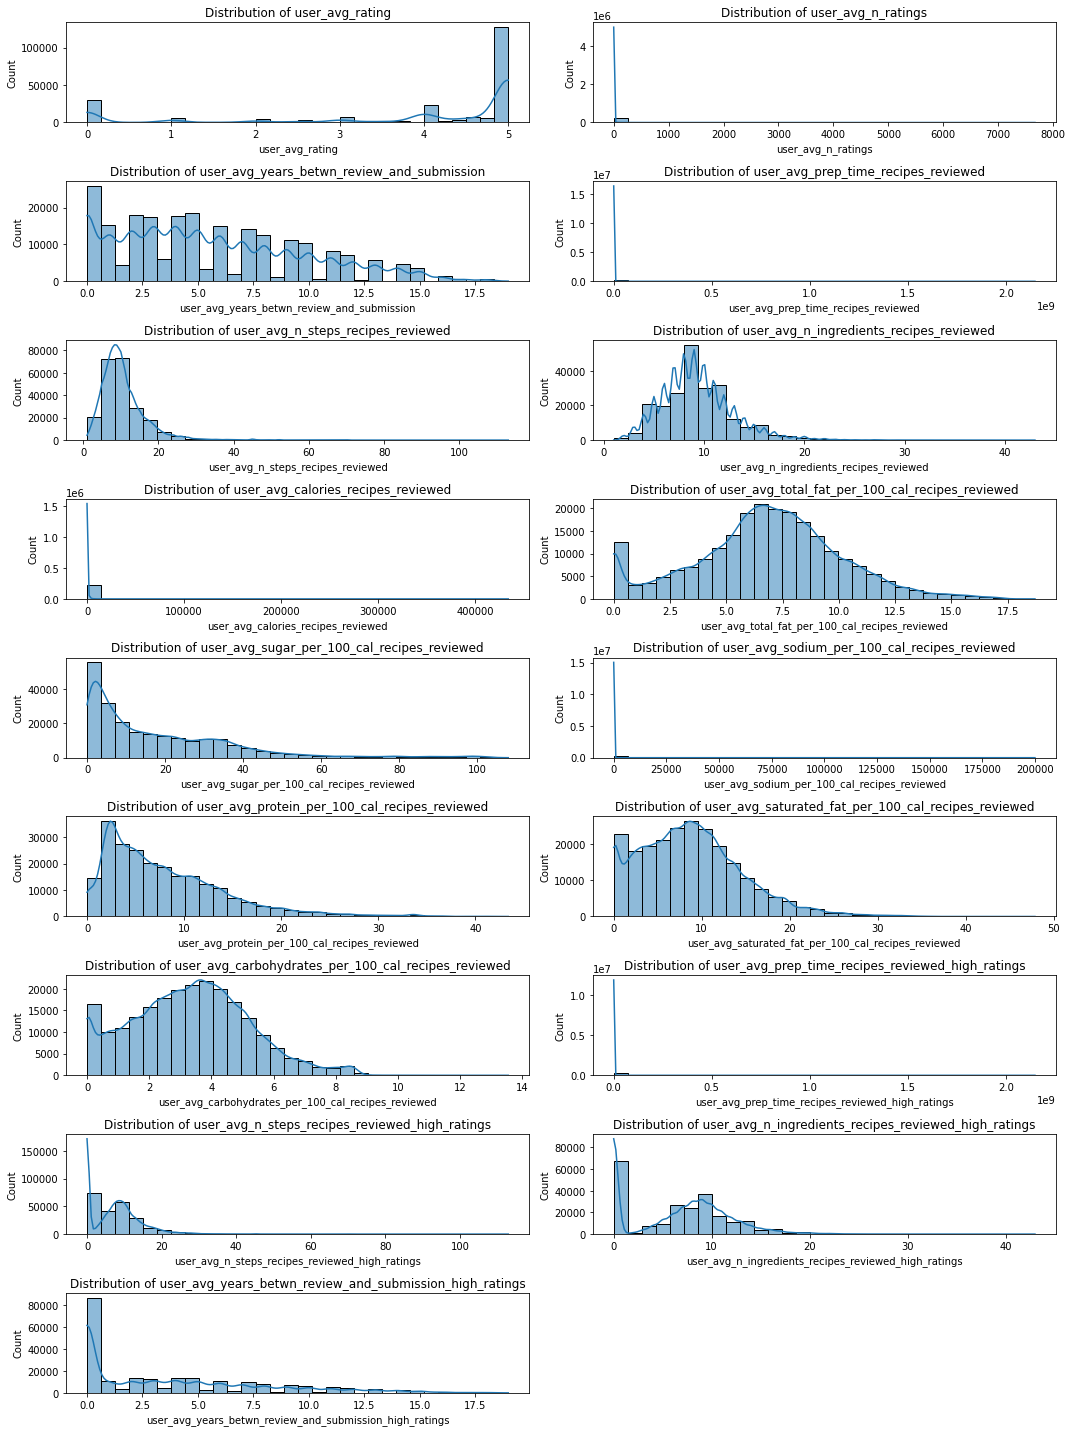

In [0]:
# Visualize the distribution of all columns in the user_level_features dataframe:

import matplotlib.pyplot as plt
import seaborn as sns

# Set the size for the plots
plt.figure(figsize=(15, 20))

# Loop through all columns and create a subplot for each
for i, column in enumerate(user_level_features.columns, 1):
    plt.subplot(9, 2, i)  # 5 rows, 4 columns
    sns.histplot(user_level_features[column], kde=True, bins=30)  # KDE plot to show the distribution
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

# Show the plot
plt.show()


## IX. Task 9: Create Tag-Level Features:

**Approach for Task 9: Create Tag-Level Features:**

Given the task and the tags column structure, the solution involves analyzing the tags, selecting valuable ones, and encoding them for further analysis. Here's the suggested method:

>> Step 1: Preprocessing the Tags Column
Objective: Parse the tags column, which contains lists of tags as strings.

>> Step 2: Identify Valuable Tags
- Frequent Tags: Identify the top 5% most frequently occurring tags.
- Highest-Rated Tags: Compute average ratings per tag and select the top 5% highest-rated and bottom 5% highest-rated tags.

Method:
- Explode the tags column so each row contains one tag.
- Calculate tag frequency and average rating per tag.
- Use percentile thresholds to filter top/bottom tags.


>> Step 3: Encoding Tags
Use one-hot encoding as the default encoding method.
Explore advanced encoding techniques like binary encoding or frequency encoding if the one-hot matrix becomes too large.

>> Step 4: Assert for Data Integrity
Validate that selected tags and encoded features are created as expected.
Use assert statements to ensure consistency (e.g., tag count matches expected values, no missing data).


In [0]:
join_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1132017 entries, 0 to 1132366
Data columns (total 35 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   user_id                   1132017 non-null  int32         
 1   recipe_id                 1132017 non-null  int32         
 2   date                      1132017 non-null  datetime64[ns]
 3   rating                    1132017 non-null  int32         
 4   review                    1132017 non-null  object        
 5   name                      1132016 non-null  object        
 6   id                        1132017 non-null  int32         
 7   minutes                   1132017 non-null  int32         
 8   contributor_id            1132017 non-null  int32         
 9   submitted                 1132017 non-null  datetime64[ns]
 10  tags                      1132017 non-null  object        
 11  n_steps                   1132017 non-null  int32 

In [0]:
join_df.tags.head(10)

Out[30]: 0    [weeknight,  time-to-make,  course,  main-ingr...
1    [weeknight,  time-to-make,  course,  main-ingr...
2    [30-minutes-or-less,  time-to-make,  course,  ...
3    [15-minutes-or-less,  time-to-make,  course,  ...
4    [15-minutes-or-less,  time-to-make,  course,  ...
5    [15-minutes-or-less,  time-to-make,  course,  ...
6    [15-minutes-or-less,  time-to-make,  course,  ...
7    [15-minutes-or-less,  time-to-make,  course,  ...
8    [60-minutes-or-less,  time-to-make,  main-ingr...
9    [60-minutes-or-less,  time-to-make,  main-ingr...
Name: tags, dtype: object

In [0]:
import pandas as pd
import numpy as np
import ast

# Step 1: Clean and preprocess the tags column
def clean_tags(tag_value):
    """
    Clean and preprocess the tags column to ensure it's valid for parsing.
    """
    if isinstance(tag_value, list):
        # If it's already a list, return as is
        return tag_value
    elif isinstance(tag_value, str):
        try:
            # Remove unnecessary spaces, ensure proper list formatting
            tag_value = tag_value.replace("'", '"').strip()
            # Convert to a Python list
            return ast.literal_eval(tag_value)
        except (ValueError, SyntaxError):
            # Handle malformed cases by returning an empty list
            return []
    else:
        # If neither list nor string, return empty list as fallback
        return []

# Apply cleaning function to the tags column
join_df['tags'] = join_df['tags'].apply(clean_tags)

# Ensure tags column is now properly formatted
assert join_df['tags'].apply(lambda x: isinstance(x, list)).all(), "Not all tags are lists"

# Step 2: Explode the tags column
exploded_tags = join_df[['tags', 'rating']].explode('tags')

# Calculate tag frequency
tag_freq = exploded_tags['tags'].value_counts()

# Calculate average rating per tag
tag_rating = exploded_tags.groupby('tags')['rating'].mean()

# Identify top 5% most frequent tags
top_5_percent_freq = tag_freq[tag_freq >= tag_freq.quantile(0.95)].index

# Identify top 5% highest-rated tags
top_5_percent_rating = tag_rating[tag_rating >= tag_rating.quantile(0.95)].index

# Identify bottom 5% highest-rated tags
bottom_5_percent_rating = tag_rating[tag_rating <= tag_rating.quantile(0.05)].index

# Combine selected valuable tags
valuable_tags = set(top_5_percent_freq).union(set(top_5_percent_rating), set(bottom_5_percent_rating))

# Step 3: Encoding Tags
# Create a column for each valuable tag (one-hot encoding)
for tag in valuable_tags:
    join_df[f'tag_{tag}'] = join_df['tags'].apply(lambda x: 1 if tag in x else 0)

# Step 4: Assert for Data Integrity
assert join_df[[f'tag_{tag}' for tag in valuable_tags]].sum().sum() > 0, "No valuable tags were encoded"
assert join_df[[f'tag_{tag}' for tag in valuable_tags]].isnull().sum().sum() == 0, "Missing values found in tag encoding"

# Optional: Drop intermediate columns if needed
join_df.drop(columns=['tags'], inplace=True)

# Display the first few rows of the updated DataFrame
join_df.head()


,user_id,recipe_id,date,rating,review,name,id,minutes,contributor_id,submitted,...,tag_ danish,tag_ chicken-stews,tag_ marinara-sauce,tag_ beef-sauces,tag_ ham-and-bean-soup,tag_ roast-beef-comfort-food,tag_ lamb-sheep-main-dish,tag_ middle-eastern-main-dish,tag_ course,tag_ bean-soup
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,white bean green chile pepper soup,40893,495,1533,2002-09-21,...,0,0,0,0,0,0,0,0,1,0
1,1293707,40893,2011-12-21,5,So simple so delicious! Great for chilly fall...,white bean green chile pepper soup,40893,495,1533,2002-09-21,...,0,0,0,0,0,0,0,0,1,0
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,devilicious cookie cake delights,44394,20,56824,2002-10-27,...,0,0,0,0,0,0,0,0,1,0
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,baked potato toppings,85009,10,64342,2004-02-25,...,0,0,0,0,0,0,0,0,1,0
4,57222,85009,2011-10-01,5,Made the cheddar bacon topping adding a sprin...,baked potato toppings,85009,10,64342,2004-02-25,...,0,0,0,0,0,0,0,0,1,0


In [0]:
from IPython.display import display

# Display DataFrame with all columns visible
with pd.option_context('display.max_columns', None):
    display(join_df)


,user_id,recipe_id,date,rating,review,name,id,minutes,contributor_id,submitted,n_steps,steps,description,ingredients,n_ingredients,calories,total_fat_PDV,sugar_PDV,sodium_PDV,protein_PDV,saturated_fat_PDV,carbohydrates_PDV,elapsed_days,elapsed_months,elapsed_years,elapsed_years_bucket,minutes_bucket,calories_bucket,total_fat_PDV_bucket,sugar_PDV_bucket,sodium_PDV_bucket,protein_PDV_bucket,saturated_fat_PDV_bucket,carbohydrates_PDV_bucket,tag_ pork-loin,tag_ beef-barley-soup,tag_ main-ingredient,tag_ honduran,tag_ american,tag_Throw the ultimate fiesta with this sopaipillas recipe from Food.com.,tag_ easy,tag_60-minutes-or-less,tag_ beef-crock-pot,tag_ eggs-breakfast,tag_ crock-pot-main-dish,tag_ low-sodium,tag_ for-large-groups-holiday-event,tag_ heirloom-historical-recipes,tag_ preparation,tag_ north-american,tag_ breakfast-casseroles,tag_ roast-beef-main-dish,tag_ equipment,tag_ baked-beans,tag_ mushroom-soup,tag_ bear,tag_cuisine,tag_ beginner-cook,tag_ occasion,tag_ snacks-sweet,tag_ taste-mood,tag_ low-in-something,tag_ sugar-cookies,tag_ jellies,tag_30-minutes-or-less,tag_ desserts-easy,tag_ simply-potatoes2,tag_ main-dish-beef,tag_ fillings-and-frostings-chocolate,tag_ desserts-fruit,tag_ main-dish,tag_ pressure-canning,tag_ oven,tag_ pork-crock-pot,tag_ low-carb,tag_ prepared-potatoes,tag_ healthy,tag_ low-cholesterol,tag_ shrimp-main-dish,tag_ pot-roast,tag_ unprocessed-freezer,tag_ vegetables,tag_ main-dish-pork,tag_ irish-st-patricks-day,tag_ breakfast-eggs,tag_ chicken-crock-pot,tag_ stews-poultry,tag_ time-to-make,tag_ cuisine,tag_ chicken-stew,tag_ desserts,tag_ birthday,tag_ dietary,tag_ meat,tag_ main-dish-pasta,tag_ pasta-salad,tag_ dinner-party,tag_ 4-hours-or-less,tag_ beans-side-dishes,tag_ snacks-kid-friendly,tag_ black-bean-soup,tag_ main-dish-seafood,tag_healthy,tag_ cabbage,tag_ holiday-event,tag_ water-bath,tag_ ragu-recipe-contest,tag_ side-dishes-beans,tag_ served-hot-new-years,tag_ high-in-something-diabetic-friendly,tag_ cranberry-sauce,tag_ beef-kidney,tag_ breakfast-potatoes,tag_ celebrity,tag_ number-of-servings,tag_ pork-loins-roast,tag_ danish,tag_ chicken-stews,tag_ marinara-sauce,tag_ beef-sauces,tag_ ham-and-bean-soup,tag_ roast-beef-comfort-food,tag_ lamb-sheep-main-dish,tag_ middle-eastern-main-dish,tag_ course,tag_ bean-soup
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,white bean green chile pepper soup,40893,495,1533,2002-09-21,4,"['combine beans , onion , chilies , 1 / 2 teas...",easy soup for the crockpot.,"['great northern beans', 'yellow onion', 'dice...",9,204.8,2.441406,4.394531,12.695312,11.718750,0.976562,4.882812,149,4,0,Q1,Q4,Q2,Q1,Q2,Q4,Q3,Q1,Q4,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1293707,40893,2011-12-21,5,So simple so delicious! Great for chilly fall...,white bean green chile pepper soup,40893,495,1533,2002-09-21,4,"['combine beans , onion , chilies , 1 / 2 teas...",easy soup for the crockpot.,"['great northern beans', 'yellow onion', 'dice...",9,204.8,2.441406,4.394531,12.695312,11.718750,0.976562,4.882812,3378,111,9,Q2,Q4,Q2,Q1,Q2,Q4,Q3,Q1,Q4,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,devilicious cookie cake delights,44394,20,56824,2002-10-27,5,"['blend together cake mix , oil and eggs', 'ad...",,"[devil's food cake mix, 'vegetable oil', 'eggs...",4,132.3,8.314437,29.478458,3.779289,3.023432,8.314437,3.779289,35,1,0,Q1,Q1,Q1,Q3,Q4,Q2,Q2,Q3,Q3,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,126440,85009,2010-02-27,5,I made the Mexican topping and 

In [0]:
# Display all column names, one per line
for col in join_df.columns:
    print(col)


user_id
recipe_id
date
rating
review
name
id
minutes
contributor_id
submitted
n_steps
steps
description
ingredients
n_ingredients
calories
total_fat_PDV
sugar_PDV
sodium_PDV
protein_PDV
saturated_fat_PDV
carbohydrates_PDV
elapsed_days
elapsed_months
elapsed_years
elapsed_years_bucket
minutes_bucket
calories_bucket
total_fat_PDV_bucket
sugar_PDV_bucket
sodium_PDV_bucket
protein_PDV_bucket
saturated_fat_PDV_bucket
carbohydrates_PDV_bucket
tag_ pork-loin
tag_ beef-barley-soup
tag_ main-ingredient
tag_ honduran
tag_ american
tag_Throw the ultimate fiesta with this sopaipillas recipe from Food.com.
tag_ easy
tag_60-minutes-or-less
tag_ beef-crock-pot
tag_ eggs-breakfast
tag_ crock-pot-main-dish
tag_ low-sodium
tag_ for-large-groups-holiday-event
tag_ heirloom-historical-recipes
tag_ preparation
tag_ north-american
tag_ breakfast-casseroles
tag_ roast-beef-main-dish
tag_ equipment
tag_ baked-beans
tag_ mushroom-soup
tag_ bear
tag_cuisine
tag_ beginner-cook
tag_ occasion
tag_ snacks-sweet
tag

In [0]:
# Print tags of top 5% most frequent tags:
print("Top 5% Most Frequent Tags:")
print(top_5_percent_freq.tolist())

# Print tags of top 5% highest-rated tags:
print("\nTop 5% Highest-Rated Tags:")
print(top_5_percent_rating.tolist())

# Print tags of bottom 5% highest-rated tags:
print("\nBottom 5% Lowest-Rated Tags:")
print(bottom_5_percent_rating.tolist())

Top 5% Most Frequent Tags:
[' preparation', ' course', ' time-to-make', ' dietary', ' main-ingredient', ' easy', ' occasion', ' equipment', ' cuisine', ' low-in-something', ' main-dish', ' number-of-servings', ' meat', '60-minutes-or-less', ' taste-mood', ' north-american', ' vegetables', ' oven', ' 4-hours-or-less', '30-minutes-or-less', ' low-carb', ' holiday-event', ' desserts', ' healthy', ' dinner-party', ' low-sodium', ' american', ' beginner-cook', ' low-cholesterol']

Top 5% Highest-Rated Tags:
[' baked-beans', ' beans-side-dishes', ' beef-kidney', ' beef-sauces', ' breakfast-casseroles', ' breakfast-eggs', ' breakfast-potatoes', ' cabbage', ' cranberry-sauce', ' danish', ' desserts-easy', ' desserts-fruit', ' eggs-breakfast', ' for-large-groups-holiday-event', ' heirloom-historical-recipes', ' irish-st-patricks-day', ' main-dish-pasta', ' middle-eastern-main-dish', ' pasta-salad', ' pork-loin', ' pork-loins-roast', ' prepared-potatoes', ' ragu-recipe-contest', ' roast-beef-com

~ ~ ~ END HERE! THANK YOU FOR YOUR TIME! ~ ~ ~